# I'm Something of a Painter Myself (GAN - Getting Started)
Kaggle competition for learning about Generative Adversarial Networks (GANs).

**Goal:** Use a GAN to generate original images that mimic the artistic style of Claude Monet.

**Task:** Build a GAN consisting of a generator and a discriminator and use it to generate 7,000 - 10,000 Monet-style images.

**Data:** The main dataset contains Monet paintings and a collection of photographs.

**Evaluation:** Submissions are evaluated using MiFID.  A lower score is better (<1000 required for class).  This metric measures the similarity
between the statistics of the real Monet images and the generated images, while penalizing images that are too close to the training samples.

**Submission:** a single images.zip file containing the 7,000-10,000 generated images, each sized 256x256x3 (RGB).

The competition overview recommends following Amy Jang's notebook that goes over the basics of loading data from TFRecods, using TPUs, and building a CycleGAN, so that's where I will start.

Sources: [TPU Notebook Walkthrough: Introduction to TFRecords] https://www.youtube.com/watch?v=KgjaC9VeOi8, Kaggle recommended starter notebooks and tutorial from Amy Jang is used extensively.  Recommended Readings from Module 5.

I was having some issues getting the TPU to work in my notebook and found a solution here: https://www.kaggle.com/code/herbison/tensorflow-v5e-8-oct-2025?scriptVersionId=267778194

In [1]:
# load version 2.18.0 of tensorflow-tpu

!export PATH="${HOME}/.local/bin:${PATH}" && uv pip install --system tensorflow-tpu=="2.18.0" --find-links https://storage.googleapis.com/libtpu-tf-releases/index.html

Using Python 3.12.11 environment at: /usr/local
Resolved 38 packages in 395ms                                        
Prepared 6 packages in 7.37s                                             
Uninstalled 5 packages in 107ms
Installed 6 packages in 10.99s                              
 - libtpu==0.0.17
 + libtpu==2.18.0
 - ml-dtypes==0.5.3
 + ml-dtypes==0.4.1
 - numpy==2.3.3
 + numpy==2.0.2
 - protobuf==6.33.0rc1
 + protobuf==5.29.5
 - tensorboard==2.20.0
 + tensorboard==2.18.0
 + tensorflow-tpu==2.18.0


In [2]:
!export PATH="${HOME}/.local/bin:${PATH}" && uv pip uninstall --system jax

Using Python 3.12.11 environment at: /usr/local
Uninstalled 1 package in 54ms
 - jax==0.7.1


In [3]:
import tensorflow as tf
print('TensorFlow version' + tf.__version__)

E0000 00:00:1761760980.326749      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:230


TensorFlow version2.18.0


In [4]:
def setup_strategy():
    # Detect and initialize TPU
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu="local")  
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.TPUStrategy(tpu)
        print(f"Running on TPU: {tpu.master()}")
    except Exception as e:
        print(f"Could not initialize TPU: {e}")
        strategy = tf.distribute.get_strategy()  # Fallback to default CPU/GPU
        print("Running on CPU or single GPU")
    
    # Print number of available TPU cores
    print("Number of devices:", strategy.num_replicas_in_sync)
    return strategy

strategy = setup_strategy()

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Initializing the TPU system: local
I0000 00:00:1761760998.236374      10 service.cc:148] XLA service 0x5d0ae2f5fe20 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761760998.236400      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1761760998.236403      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1761760998.236405      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1761760998.236406      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1761760998.236408      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1761760998.236410      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1761760998.236412      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1761760998.236414      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Running on TPU: 
Number of devices: 8


## Load the Data from TFRecords
TPUs need data streamlined efficiently, the data for this competition is provided in TFRecord format. Parse the records into TensorFlow datasets.

In [5]:
# Get the data paths
with strategy.scope():
    PATH = '/kaggle/input/gan-getting-started'

    # Get the files for the Monet paintings and the Photos
    MONET_FILENAMES = tf.io.gfile.glob(str(PATH + '/monet_tfrec/*.tfrec'))
    PHOTO_FILENAMES = tf.io.gfile.glob(str(PATH + '/photo_tfrec/*.tfrec'))

In [6]:
# Define data processing functions
def decode_image(image):
    # Decode the image bytes to a tensor
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert to float and normalize to [-1, 1]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

# Function to read a single image from the TFRecord
def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

# Function to load the full dataset
def load_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

In [7]:
# Create final datasets
BATCH_SIZE = 1 # CycleGAN typically uses a batch size of 1

# Load the datasets
monet_ds = load_dataset(MONET_FILENAMES).shuffle(300).batch(BATCH_SIZE).repeat()
photo_ds = load_dataset(PHOTO_FILENAMES).shuffle(2000).batch(BATCH_SIZE).repeat()

# Zip them together for CycleGAN training
full_dataset = tf.data.Dataset.zip((monet_ds, photo_ds))

## Building the CycleGAN model
The starter notebook uses CycleGAN.  CycleGAN uses two paird GANs to learn a mapping between two image domains without paired examples.  

### Generator Architecture (U-Net)
Generator's role is to translate an image from one domain to the other.  In this case, from a photo to a Monet Style painting.  We'll use U-Net for image-to-image translation.  The structure consists of an Encoder and a Decoder with a skip connection linking them.  

The encoder is used to capture the general features and context of the image.  It has 3 components: Conv2D, InstanceNormalization, and LeakyReLU.  The stride is set to 2 to halve the image dimensions.

The decoder is used to reconstruct the image with the translated style.  It also has 3 components: Conv2DTranspose, InstanceNormalization, and ReLU.

A final Conv2D layer with a tanh activation function is used as the output layer in the normalization range of [-1,1] (the standard input range for the tanh activation).

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.layers import GroupNormalization

def apply_normalization(x):
    return GroupNormalization(groups=1, axis=-1)(x)

def downsample(filters, size, apply_norm=True):
    # This block performs Conv -> Norm -> Activation
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=2, padding='same', 
                             kernel_initializer=initializer, use_bias=False))
    if apply_norm:
        result.add(GroupNormalization(groups=1, axis=-1))
    result.add(layers.LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    # This block performs ConvTranspose -> Norm -> Activation
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    
    result.add(layers.Conv2DTranspose(filters, size, strides=2, padding='same', 
                                      kernel_initializer=initializer, use_bias=False))
    
    result.add(GroupNormalization(groups=1, axis=-1))
    
    if apply_dropout:
        result.add(layers.Dropout(0.5))
        
    result.add(layers.ReLU())
    return result

# The full Generator model definition
def Generator():
    INPUT_SHAPE = (256, 256, 3)
    inputs = layers.Input(shape=INPUT_SHAPE)

    # Encoder path
    down_stack = [
        downsample(64, 4, apply_norm=False), # (128, 128, 64)
        downsample(128, 4),                  # (64, 64, 128)
        downsample(256, 4),                  # (32, 32, 256)
        downsample(512, 4),                  # (16, 16, 512)
        downsample(512, 4),                  # (8, 8, 512)
        downsample(512, 4),                  # (4, 4, 512)
        downsample(512, 4),                  # (2, 2, 512)
        downsample(512, 4),                  # (1, 1, 512)
    ]

    # Decoder path
    up_stack = [
        upsample(512, 4, apply_dropout=True), # (2, 2, 512)
        upsample(512, 4, apply_dropout=True), # (4, 4, 512)
        upsample(512, 4, apply_dropout=True), # (8, 8, 512)
        upsample(512, 4),                     # (16, 16, 512)
        upsample(256, 4),                     # (32, 32, 256)
        upsample(128, 4),                     # (64, 64, 128)
        upsample(64, 4),                      # (128, 128, 64)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    # The final layer to output the 256x256x3 image
    last = layers.Conv2DTranspose(3, 4, strides=2, padding='same', 
                                  kernel_initializer=initializer, activation='tanh')
    
    x = inputs
    skips = []
    
    # Encoder
    for down in down_stack:
        x = down(x)
        skips.append(x) 
    
    skips = reversed(skips[:-1])
    
    # Decoder
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x) # (256, 256, 3)

    return tf.keras.Model(inputs=inputs, outputs=x)

### Discriminator Architecture (PatchGAN)
The role of the discriminator is to distinguish between real images from Monet and fake images from the generator.  PatchGAN outputs a 30x30 grid of predictions, each value in the grid corresponds to whether a small patch of the input image is real or fake.

A series of Conv2D layers is used to reduce the image size tothe patch grid (30x30).  The output layer is a final Conv2D layer with a single channel output (30x30x1).  This is a patch prediction map where each pixel is the discriminator's score for that patch.

In [9]:
def Discriminator():
    INPUT_SHAPE = (256, 256, 3)
    inputs = layers.Input(shape=INPUT_SHAPE, name='input_image')
    initializer = tf.random_normal_initializer(0., 0.02)
    
    # C64 - No Norm on first layer
    x = layers.Conv2D(64, 4, strides=2, padding='same', 
                      kernel_initializer=initializer, use_bias=False)(inputs)
    x = layers.LeakyReLU(0.2)(x) # (128, 128, 64)

    # C128
    x = layers.Conv2D(128, 4, strides=2, padding='same', 
                      kernel_initializer=initializer, use_bias=False)(x)
    x = GroupNormalization(groups=1, axis=-1)(x) 
    x = layers.LeakyReLU(0.2)(x) # (64, 64, 128)

    # C256
    x = layers.Conv2D(256, 4, strides=2, padding='same', 
                      kernel_initializer=initializer, use_bias=False)(x)
    x = GroupNormalization(groups=1, axis=-1)(x)
    x = layers.LeakyReLU(0.2)(x) # (32, 32, 256)

    # C512 
    # Stride=1  to get the 30x30 patch
    x = layers.Conv2D(512, 4, strides=1, padding='same', 
                      kernel_initializer=initializer, use_bias=False)(x)
    x = GroupNormalization(groups=1, axis=-1)(x)
    x = layers.LeakyReLU(0.2)(x) # (32, 32, 512)

    # Output layer (the Patch) (30, 30, 1)
    last = layers.Conv2D(1, 4, strides=1, padding='same', kernel_initializer=initializer)(x)

    return tf.keras.Model(inputs=inputs, outputs=last)

### CycleGAN Loss Functions
CycleGAN Architecture relies on three distinct loss funcitons: Adversarial Loss, Cycle Consistency Loss, and Identity Loss. 

These loss functions will be definied inside of the TPU strategy scope.

#### Adversarial Loss (Generator and Discriminator)
Standard GAN loss.  Discriminator tries to classify inputs as real or fake, while the generator tries to fool the discriminator by making its fake images classified as real.

In [10]:
# LAMBDA is the weighting factor for the cycle consistency loss.
LAMBDA = 10 

with strategy.scope():
    # We use BinaryCrossentropy with from_logits=True because the Discriminator outputs raw logits (not probabilities).
    loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)

    def discriminator_loss(real, generated):
        # Loss for real images (should be close to 1)
        real_loss = loss_obj(tf.ones_like(real), real)
        
        # Loss for fake images (should be close to 0)
        generated_loss = loss_obj(tf.zeros_like(generated), generated)
        
        # Total loss is the average of both
        total_disc_loss = real_loss + generated_loss
        
        # We average over the batch and the patch (e.g., 30x30 output)
        return total_disc_loss
        
    def generator_loss(generated):
        return loss_obj(tf.ones_like(generated), generated)
    

#### Cycle Consistency Loss (L1)
MAE or L1 loss between original image and the image that has completed the full cycle.

In [11]:
def calc_cycle_loss(real_image, cycled_image, LAMBDA):
    # L1 loss (Mean Absolute Error) measures pixel-wise difference
    loss = tf.reduce_mean(tf.abs(real_image - cycled_image))
    # The loss is multiplied by LAMBDA (10) to give it a high weight
    return LAMBDA * loss

#### Identity Loss (L1)
MAE between a real Monet image and the output of the Monet-to-Photo generator when it is fed a Monet image.  

In [12]:
def identity_loss(real_image, same_image, LAMBDA):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return 0.5 * LAMBDA * loss

### Compiling the Full CycleGAN Model
#### Define the optimizers 
There are four distinct networks, they need their own optimizers.  We'll use the Adam optimizer for all of them with parameters recommended by the original CycleGAN paper.

In [13]:
with strategy.scope():
    # Optimizers for the two Generators (G_monet and G_photo)
    monet_generator_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
    
    # Optimizers for the two Discriminators (D_monet and D_photo)
    monet_discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)

#### Assemble the Complete CycleGAN Model
Combine all four models and the losses using tf.keras.Model

In [14]:
with strategy.scope():
    monet_generator = Generator()
    photo_generator = Generator()
    monet_discriminator = Discriminator()
    photo_discriminator = Discriminator()

I0000 00:00:1761761009.180826      10 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


This custom CycleGAN class from Amy Jang's tutorial will manage the forward and backward passes, calculating the four primary losses (two adversarial, cycle consistency, and identity) in every training step.

In [15]:
class CycleGan(tf.keras.Model):
    def __init__(self, 
                 monet_generator, 
                 photo_generator, 
                 monet_discriminator, 
                 photo_discriminator, 
                 gen_loss_fn, 
                 disc_loss_fn, 
                 cycle_loss_fn, 
                 identity_loss_fn):
        
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn

    def call(self, inputs):
        real_photo = inputs 
        # Use the primary translation: Photo -> Monet
        fake_monet = self.m_gen(real_photo, training=False)
        return fake_monet
        
    def compile(self, 
                m_gen_optimizer, 
                p_gen_optimizer, 
                m_disc_optimizer, 
                p_disc_optimizer, 
                **kwargs):
        
        super(CycleGan, self).compile(**kwargs)
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        
    @tf.function
    def train_step(self, data):
        # Unpack the data: one real Monet, one real Photo
        real_monet, real_photo = data
        
        # All loss calculations must be done within a GradientTape context
        with tf.GradientTape(persistent=True) as tape:
            # Forward Pass & Generate Images
            # Photo -> Monet
            fake_monet = self.m_gen(real_photo, training=True)
            # Monet -> Photo
            fake_photo = self.p_gen(real_monet, training=True)
            
            # Cycle 1: Photo -> Monet -> Photo
            cycled_photo = self.p_gen(fake_monet, training=True)
            # Cycle 2: Monet -> Photo -> Monet
            cycled_monet = self.m_gen(fake_photo, training=True)
            
            # Identity: Monet -> Monet (no change)
            same_monet = self.m_gen(real_monet, training=True)
            # Identity: Photo -> Photo (no change)
            same_photo = self.p_gen(real_photo, training=True)
            
            # Discriminator Predictions
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            
            disc_real_photo = self.p_disc(real_photo, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)
            
            # Calculate Losses
            
            # Generator Adversarial Losses (G wants to fool D)
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)
            
            # Cycle Consistency Losses
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, LAMBDA) + \
                               self.cycle_loss_fn(real_photo, cycled_photo, LAMBDA)
            
            # Identity Losses
            total_identity_loss = self.identity_loss_fn(real_monet, same_monet, LAMBDA) + \
                                  self.identity_loss_fn(real_photo, same_photo, LAMBDA)
            
            # Total Generator Losses
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + total_identity_loss
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + total_identity_loss
            
            # Discriminator Losses
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Apply Gradients
        # Calculate gradients for each network
        monet_gen_gradients = tape.gradient(total_monet_gen_loss, self.m_gen.trainable_variables)
        photo_gen_gradients = tape.gradient(total_photo_gen_loss, self.p_gen.trainable_variables)
        
        monet_disc_gradients = tape.gradient(monet_disc_loss, self.m_disc.trainable_variables)
        photo_disc_gradients = tape.gradient(photo_disc_loss, self.p_disc.trainable_variables)
        
        # Apply the gradients
        self.m_gen_optimizer.apply_gradients(zip(monet_gen_gradients, self.m_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_gen_gradients, self.p_gen.trainable_variables))
        
        self.m_disc_optimizer.apply_gradients(zip(monet_disc_gradients, self.m_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_disc_gradients, self.p_disc.trainable_variables))
        
        # Return a dictionary of loss values for monitoring
        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }

#### Instantiate the CycleGAN Model


In [16]:
with strategy.scope():
    # Instantiate the custom model
    cycle_gan_model = CycleGan(
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        gen_loss_fn=generator_loss,
        disc_loss_fn=discriminator_loss,
        cycle_loss_fn=calc_cycle_loss,
        identity_loss_fn=identity_loss
    )

    # Compile the model, passing the individual optimizers to the custom compile method
    cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer
    )

## Training the Model
Use standard Keras .fit() method, passing in the zipped dataset (full_dataset).  Training is highly resource-intensive and the number of epochs will depend on TPU time contraints and desired scores.  Typically 25-50 epochs.

In [17]:
# Train the model
# The tf.data.Dataset.zip creates a data pipeline that yields (real_monet, real_photo) pairs
EPOCHS = 25 # ideally would set to 25-50 with more time
print("Starting training...")

# Fit the model to the zipped dataset
history = cycle_gan_model.fit(
    full_dataset, 
    epochs=EPOCHS,
    steps_per_epoch=300
)

print("Training complete.")

Starting training...
Epoch 1/25


I0000 00:00:1761761093.779500      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:13733613979600704332
I0000 00:00:1761761098.610453    1164 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(14994367999913173626), session_name()
I0000 00:00:1761761215.786086    1164 tpu_compile_op_common.cc:245] Compilation of 14994367999913173626 with session name  took 1m57.175554037s and succeeded
I0000 00:00:1761761215.964635    1164 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(14994367999913173626), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_13733613979600704332", property.function_library_fingerprint = 4297018061568196449, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 4, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wr

500/500 ━━━━━━━━━━━━━━━━━━━━ 332s 195ms/step - monet_disc_loss: 1517.3428 - monet_gen_loss: 548.9778 - photo_disc_loss: 1651.7988 - photo_gen_loss: 936.8217
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 190ms/step - monet_disc_loss: 1339.2424 - monet_gen_loss: 863.5148 - photo_disc_loss: 1331.3875 - photo_gen_loss: 783.0341
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 94s 188ms/step - monet_disc_loss: 1035.0465 - monet_gen_loss: 993.3734 - photo_disc_loss: 1382.6998 - photo_gen_loss: 824.6622
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 191ms/step - monet_disc_loss: 1057.6852 - monet_gen_loss: 1133.8453 - photo_disc_loss: 1405.0649 - photo_gen_loss: 675.2098
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 92s 184ms/step - monet_disc_loss: 613.5648 - monet_gen_loss: 1918.6146 - photo_disc_loss: 1374.0488 - photo_gen_loss: 760.0891
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 183ms/step - monet_disc_loss: 976.3771 - monet_gen_loss: 901.7328 - photo_disc_loss: 1401.3024 - photo_gen_loss: 680.8510 
Epoch 7

In [20]:
import matplotlib.pyplot as plt

# Get a single sample photo from the dataset
def get_sample_photo(filenames):
    # Load and batch the dataset to get a single image
    ds = load_dataset(filenames).batch(1).take(1)
    for sample in ds:
        return sample
    return None

# Visualization Function
def display_final_generation(model, test_input):
    
    with strategy.scope():
        # Generate the prediction (Monet-style image)
        prediction = model(test_input, training=False)

    # Denormalize images from [-1, 1] to [0, 1] for plotting
    input_image = test_input[0].numpy() * 0.5 + 0.5
    generated_image = prediction[0].numpy() * 0.5 + 0.5
    
    plt.figure(figsize=(10, 5))

    # Input Photo
    plt.subplot(1, 2, 1)
    plt.title('Input Photo')
    plt.imshow(input_image) 
    plt.axis('off')

    # Generated Monet Painting
    plt.subplot(1, 2, 2)
    plt.title('Generated Monet Painting')
    plt.imshow(generated_image) 
    plt.axis('off')
    
    plt.show()

Final Generated Sample


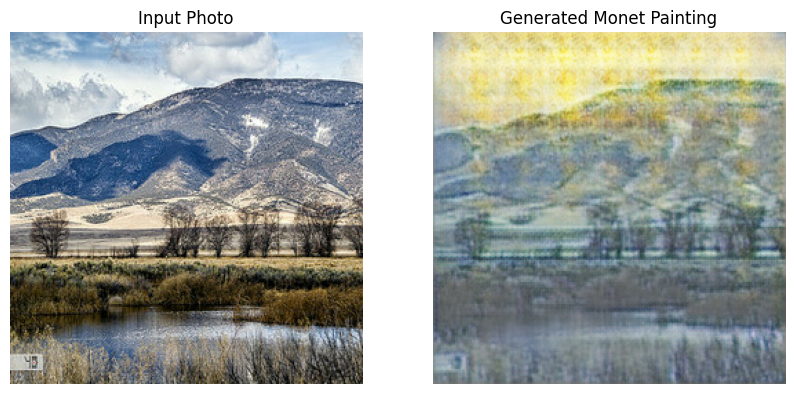

In [22]:
# Get one sample photo
sample_photo = get_sample_photo(PHOTO_FILENAMES)


print("Final Generated Sample")
display_final_generation(monet_generator, sample_photo)


## Submission Images and Zip File
Use the best generator to create the 7,000-10,000 images.  Write to a temp folder due to file output limit from Kaggle.

In [18]:
# Create a new, batched dataset specifically for generation
GENERATION_BATCH_SIZE = 16 

# Re-define the photo dataset for generation
PHOTO_FILENAMES = tf.io.gfile.glob(str('/kaggle/input/gan-getting-started' + '/photo_tfrec/*.tfrec'))
# Load and batch the dataset
photo_ds_batched = load_dataset(PHOTO_FILENAMES).batch(GENERATION_BATCH_SIZE)

In [19]:
import PIL
import numpy as np
import os
import shutil

OUTPUT_DIR = '../images'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# GENERATE ALL IMAGES (TPU ACCELERATED)
generated_images_list = []

print("Starting high-speed generation on TPU...")

with strategy.scope():
    for img_batch in photo_ds_batched:
        # Perform inference on the batch
        prediction_batch = monet_generator(img_batch, training=False)
        # Convert to a numpy array (This happens on the CPU, but in larger chunks)
        prediction_batch_np = prediction_batch.numpy() 
        generated_images_list.append(prediction_batch_np)

# Concatenate all batches into one large array
all_generated_images = np.concatenate(generated_images_list, axis=0)

# SAVE IMAGES
print(f"Generation complete. Starting sequential save for {all_generated_images.shape[0]} images...")

i = 0
for prediction in all_generated_images:
    # Denormalize
    prediction_denorm = (prediction * 127.5 + 127.5).astype(np.uint8)
    
    # Save
    im = PIL.Image.fromarray(prediction_denorm)
    im.save(os.path.join(OUTPUT_DIR, f"{i}.jpg"))
    
    i += 1
    if i >= 7000: # Ensure we save at least 7000 images
        break

print(f"Save complete. Saved {i} images.")

# CREATE FINAL SUBMISSION FILE 
shutil.make_archive('/kaggle/working/images', 'zip', OUTPUT_DIR)
print("Submission file images.zip created successfully.")

Starting high-speed generation on TPU...
Generation complete. Starting sequential save for 7038 images...
Save complete. Saved 7000 images.
Submission file images.zip created successfully.
